rays aperture 0.0
rays aperture 3.9308643
rays aperture 3.9687157


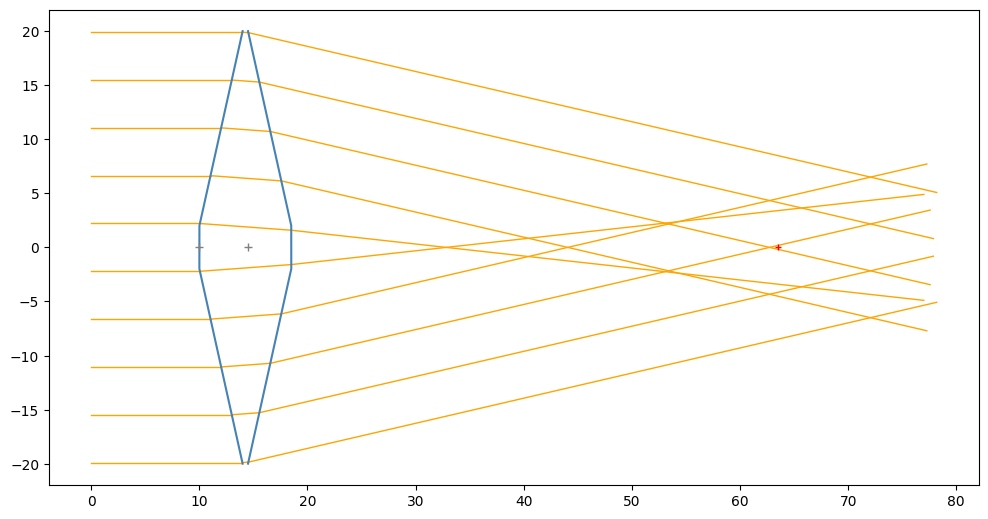

[Parameter containing:
tensor([0.0000, 0.4444, 0.8889, 1.3333, 1.7778, 2.2222, 2.6667, 3.1111, 3.5556,
        4.0000], requires_grad=True)]


[  0/100] L= 23.107 | grad norm= 161.7642364501953
[  5/100] L=  8.287 | grad norm= 98.48527526855469


[ 10/100] L=  2.220 | grad norm= 48.34627151489258


[ 15/100] L=  1.081 | grad norm= 30.340517044067383


[ 20/100] L=  0.930 | grad norm= 38.85064697265625


[ 25/100] L=  0.919 | grad norm= 40.70596694946289
[ 30/100] L=  0.354 | grad norm= 25.239931106567383


[ 35/100] L=  0.128 | grad norm= 11.701885223388672
[ 40/100] L=  0.089 | grad norm= 11.52685260772705


[ 45/100] L=  0.129 | grad norm= 14.439611434936523


[ 50/100] L=  0.050 | grad norm= 9.02714729309082


[ 55/100] L=  0.018 | grad norm= 4.374374866485596
[ 60/100] L=  0.014 | grad norm= 4.79115104675293


[ 65/100] L=  0.016 | grad norm= 5.202784061431885
[ 70/100] L=  0.006 | grad norm= 3.0564982891082764


[ 75/100] L=  0.001 | grad norm= 1.2803821563720703
[ 80/100] L=  0.003 | grad norm= 2.238034248352051


[ 85/100] L=  0.002 | grad norm= 1.8085891008377075
[ 90/100] L=  0.000 | grad norm= 0.23528045415878296


[ 95/100] L=  0.001 | grad norm= 1.0020912885665894


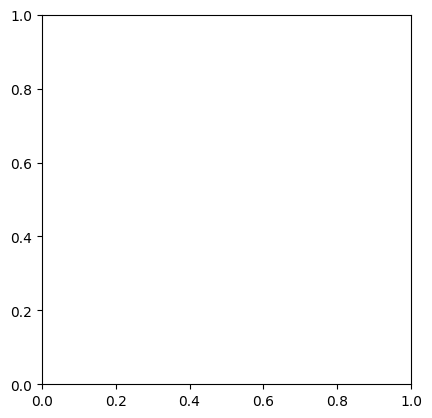

/home/victor/projects/torchlensmaker/src/torchlensmaker/training.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


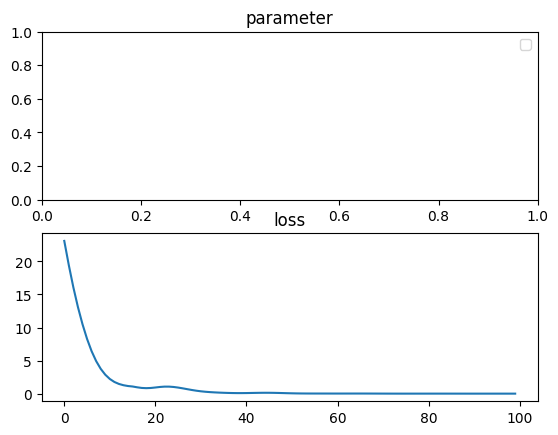

rays aperture 0.0
rays aperture 3.948413
rays aperture 3.9294243


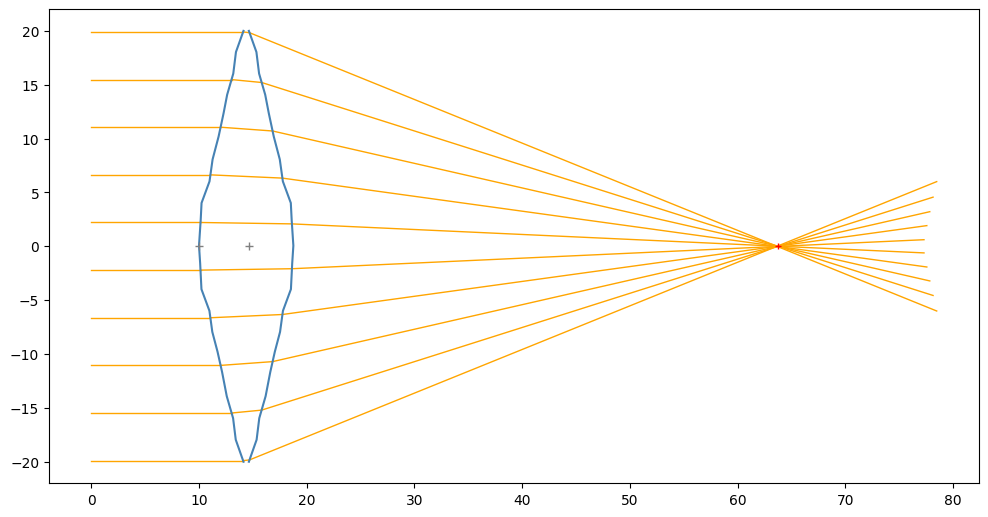

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchlensmaker as tlm


class Optics(tlm.Module):
    def __init__(self):
        super().__init__()
        self.shape = tlm.PiecewiseLine(40., X=nn.Parameter(torch.linspace(0.0, 4.0, 10)))

        self.lens = tlm.SymmetricLens(self.shape, (1.0, 1.5), outer_thickness=0.5)

        self.optics = tlm.OpticalSequence(
            tlm.PointSourceAtInfinity(beam_diameter=40),
            tlm.Gap(10.),
            
            self.lens,
            
            tlm.Gap(45.0),
            tlm.FocalPoint(),
        )

    def forward(self, inputs, sampling):
        return self.optics(inputs, sampling)

optics = Optics()

tlm.render_plt(optics)

print(list(optics.parameters()))

tlm.optimize(
    optics,
    optimizer = optim.Adam(optics.parameters(), lr=1e-2),
    sampling = {"rays": 10},
    num_iter = 100
)

tlm.render_plt(optics)